In [42]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'Data-Analysis-Project'))
	print(os.getcwd())
except:
	pass


In [43]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import numpy.random as nr
import math


In [44]:
# load datasets
Malaria = pd.read_csv('./NG_2015_MIS_07012019_1354_135943/nmis.csv')


In [45]:
Malaria.head(20)


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto
5,1016,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,wood planks,cardboard,zinc/metal,no,yes,no,yes,yes,yes,richer,NaN,sokoto
6,1019,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,plywood,zinc/metal,no,no,yes,yes,no,yes,richest,NaN,sokoto
7,1022,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,NaN,sokoto
8,1025,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,NaN,sokoto
9,1027,north west,urban,tube well or borehole,pit latrine with slab,yes,cement,cement,zinc/metal,no,no,no,no,no,no,richer,NaN,sokoto


In [46]:
# assign human-readable names to column/variable names in the dataset


In [47]:
Malaria.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria.shape)


(7745, 18)


In [48]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [49]:
# Some of the column/variable names contain wild/special chars
Malaria.columns=[str.replace('/','or') for str in Malaria.columns]


In [50]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [51]:
Malaria.dtypes

# We are going to check which of our variables have missing values


Case Identification                     int64
Region                                 object
Type of Place of Residence             object
Source of Drinking Water               object
Type of Toilet Facility                object
Has Electricity                        object
Main Floor Material                    object
Main Wall Material                     object
Main Roof Material                     object
Has Bicycle                            object
Has MotorcycleorScooter                object
Has CarorTruck                         object
Has Mosquito Bed Net for Sleeping      object
Owns Land Suitable for Agriculture     object
Has Bank Account                       object
Wealth Index                           object
Cost of Treatment for Fever           float64
State                                  object
dtype: object

In [52]:
# check for missing values
Malaria.isnull().sum(axis=0) 


Case Identification                      0
Region                                   0
Type of Place of Residence               0
Source of Drinking Water                 0
Type of Toilet Facility                  1
Has Electricity                          0
Main Floor Material                      0
Main Wall Material                       0
Main Roof Material                       0
Has Bicycle                              0
Has MotorcycleorScooter                  0
Has CarorTruck                           0
Has Mosquito Bed Net for Sleeping        0
Owns Land Suitable for Agriculture       0
Has Bank Account                         0
Wealth Index                             0
Cost of Treatment for Fever           7742
State                                    0
dtype: int64

  'Type of Toilet Facility' and 'Cost of Treatment for Fever' contains missing values. We are going to remove both columns from our dataset.

In [53]:
Malaria.drop(['Cost of Treatment for Fever','Type of Toilet Facility'], axis=1, inplace=True)



In [54]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,north west,urban,protected well,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,1004,north west,urban,tanker truck,yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,1007,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,1010,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,1013,north west,urban,tanker truck,yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto


In [55]:
#put our table in form of pandas dataframe for analysis
df = pd.DataFrame(Malaria)


In [56]:
df


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,north west,urban,protected well,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,1004,north west,urban,tanker truck,yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,1007,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,1010,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,1013,north west,urban,tanker truck,yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto
5,1016,north west,urban,tube well or borehole,yes,wood planks,cardboard,zinc/metal,no,yes,no,yes,yes,yes,richer,sokoto
6,1019,north west,urban,tube well or borehole,yes,cement,plywood,zinc/metal,no,no,yes,yes,no,yes,richest,sokoto
7,1022,north west,urban,tanker truck,yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,sokoto
8,1025,north west,urban,tanker truck,yes,cement,cement,zinc/metal,no,yes,no,yes,no,yes,richest,sokoto
9,1027,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,no,no,no,no,no,richer,sokoto


In [57]:
#Descriptive statistics/analysis


In [58]:
df['State'].value_counts()



bauchi           225
taraba           225
yobe             225
lagos            225
abia             225
gombe            225
jigawa           225
adamawa          225
bayelsa          225
cross river      225
sokoto           224
oyo              224
ondo             223
kebbi            223
osun             221
ogun             220
akwa ibom        220
zamfara          220
katsina          220
rivers           220
kaduna           219
enugu            217
ekiti            217
kano             216
benue            211
edo              211
kogi             211
niger            206
ebonyi           201
nasarawa         200
plateau          196
kwara            194
imo              191
delta            180
anambra          168
fct abuja        167
borno - urban     75
Name: State, dtype: int64

In [59]:
df['Has Electricity'].value_counts()



yes    4247
no     3498
Name: Has Electricity, dtype: int64

In [60]:
df['Source of Drinking Water'].value_counts()



tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: Source of Drinking

In [61]:
df['Wealth Index'].value_counts()



richer     1844
richest    1816
middle     1676
poorer     1351
poorest    1058
Name: Wealth Index, dtype: int64

In [62]:
df['Has Mosquito Bed Net for Sleeping'].value_counts()



yes    5432
no     2313
Name: Has Mosquito Bed Net for Sleeping, dtype: int64

In [63]:
df.groupby('Wealth Index')['State'].describe()


,count,unique,top,freq
Wealth Index,,,,
middle,1676,37,nasarawa,89
poorer,1351,35,taraba,97
poorest,1058,25,sokoto,108
richer,1844,37,ekiti,107
richest,1816,36,lagos,207


In [64]:
df.groupby('Has Mosquito Bed Net for Sleeping')['State'].describe()


,count,unique,top,freq
Has Mosquito Bed Net for Sleeping,,,,
no,2313,37,edo,124
yes,5432,37,bauchi,221


In [65]:
df.groupby('Has Electricity')['State'].describe()


,count,unique,top,freq
Has Electricity,,,,
no,3498,37,adamawa,189
yes,4247,37,lagos,224


In [66]:
df['Source of Drinking Water'].value_counts()


tube well or borehole                                   2795
river/dam/lake/ponds/stream/canal/irrigation channel     829
unprotected well                                         819
protected well                                           786
sachet water                                             786
public tap/standpipe                                     393
unprotected spring                                       349
rainwater                                                308
piped into dwelling                                      238
piped to yard/plot                                       101
protected spring                                          87
piped to neighbor                                         84
tanker truck                                              71
bottled water                                             68
cart with small tank                                      27
other                                                      4
Name: Source of Drinking

 From the table above, most people source of drinking water is Tube Well or Borehole.

In [67]:
#APPLICATION OF MACHINE LEARNING MODELS


In [68]:
Malaria.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,north west,urban,protected well,yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,sokoto
1,1004,north west,urban,tanker truck,yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,sokoto
2,1007,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,sokoto
3,1010,north west,urban,tube well or borehole,yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,sokoto
4,1013,north west,urban,tanker truck,yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,sokoto


In [69]:
Malaria_ML = pd.read_csv("./NG_2015_MIS_07012019_1354_135943/numeric_nmis.csv")


In [70]:
Malaria_ML.head()


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [71]:
Malaria_ML.head()


,hhid,hv024,hv025,hv201,hv205,hv206,hv213,hv214,hv215,hv210,hv211,hv212,hv227,hv244,hv247,hv270,sh16_22,shstate
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [72]:
Malaria_ML.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle/Scooter',
                'Has Car/Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(Malaria_ML.shape)
Malaria_ML.head()


(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle/Scooter,Has Car/Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,3,1,31,21.0,1,34,31,31,0,0,0,1,1,0,4,NaN,10
1,1004,3,1,61,21.0,1,22,31,31,1,0,1,1,1,1,4,NaN,10
2,1007,3,1,21,21.0,1,34,31,31,0,1,0,1,0,0,4,NaN,10
3,1010,3,1,21,21.0,1,34,31,31,1,1,1,1,0,0,5,NaN,10
4,1013,3,1,61,21.0,1,33,31,31,0,1,1,1,0,1,5,NaN,10


In [73]:
Malaria_ML.columns=[str.replace('/','or') for str in Malaria_ML.columns]



In [74]:
Malaria_ML.isnull().sum(axis=0) 


Case Identification                      0
Region                                   0
Type of Place of Residence               0
Source of Drinking Water                 0
Type of Toilet Facility                  1
Has Electricity                          0
Main Floor Material                      0
Main Wall Material                       0
Main Roof Material                       0
Has Bicycle                              0
Has MotorcycleorScooter                  0
Has CarorTruck                           0
Has Mosquito Bed Net for Sleeping        0
Owns Land Suitable for Agriculture       0
Has Bank Account                         0
Wealth Index                             0
Cost of Treatment for Fever           7742
State                                    0
dtype: int64

In [75]:
Malaria_ML.drop(['Cost of Treatment for Fever','Type of Toilet Facility'], axis=1, inplace=True)


In [76]:
Malaria_ML.head()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4,10
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4,10
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4,10
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5,10
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5,10


In [77]:
Malaria_ML.tail()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,State
7740,333108,6,2,21,1,34,31,36,0,0,0,1,0,1,5,370
7741,333113,6,2,72,1,34,31,36,0,0,0,1,0,1,5,370
7742,333119,6,2,72,1,33,31,36,0,0,0,0,0,1,5,370
7743,333124,6,2,21,1,34,31,36,0,1,0,1,1,1,5,370
7744,333129,6,2,72,1,35,31,36,0,0,1,1,0,1,5,370


In [78]:
def plot_corr(Malaria_ML, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        Malaria: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = Malaria_ML.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks


 Correlated Feature Check.
 Correlation by color. Red is most correlated with other variable, Yellow is self to self correlated and Blue is least correlated with other variable.

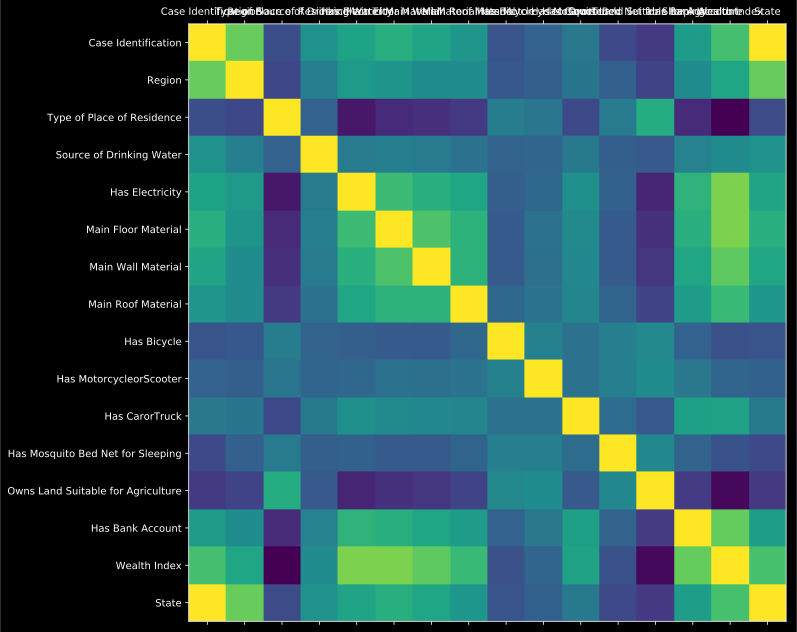

In [79]:
plot_corr(Malaria_ML)


 State and Case Identification appears to be correlated.
 Drop State Column

In [80]:
del Malaria_ML['State']


In [81]:
Malaria_ML.head(5)



,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
0,1002,3,1,31,1,34,31,31,0,0,0,1,1,0,4
1,1004,3,1,61,1,22,31,31,1,0,1,1,1,1,4
2,1007,3,1,21,1,34,31,31,0,1,0,1,0,0,4
3,1010,3,1,21,1,34,31,31,1,1,1,1,0,0,5
4,1013,3,1,61,1,33,31,31,0,1,1,1,0,1,5


In [82]:
Malaria_ML.corr()


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has MotorcycleorScooter,Has CarorTruck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index
Case Identification,1.000000,0.638409,-0.177266,0.242676,0.346377,0.418109,0.357156,0.258999,-0.146223,-0.065743,0.069666,-0.209099,-0.287561,0.308290,0.539692
Region,0.638409,1.000000,-0.216489,0.114729,0.289712,0.249819,0.204138,0.195965,-0.126653,-0.079921,0.050046,-0.076920,-0.239670,0.202319,0.362222
Type of Place of Residence,-0.177266,-0.216489,1.000000,-0.062668,-0.451181,-0.369315,-0.343694,-0.290769,0.105237,0.059444,-0.207979,0.081198,0.406885,-0.362743,-0.552373
Source of Drinking Water,0.242676,0.114729,-0.062668,1.000000,0.083321,0.114668,0.094403,0.032614,-0.056048,-0.046185,0.076336,-0.082932,-0.119719,0.133601,0.194949
Has Electricity,0.346377,0.289712,-0.451181,0.083321,1.000000,0.510600,0.433182,0.368053,-0.080331,-0.035021,0.227692,-0.068400,-0.394045,0.459657,0.695772
Main Floor Material,0.418109,0.249819,-0.369315,0.114668,0.510600,1.000000,0.564095,0.452509,-0.105225,0.032129,0.191956,-0.115477,-0.331080,0.426058,0.692384
Main Wall Material,0.357156,0.204138,-0.343694,0.094403,0.433182,0.564095,1.000000,0.453377,-0.110117,0.023289,0.174703,-0.111986,-0.308910,0.363704,0.614118
Main Roof Material,0.258999,0.195965,-0.290769,0.032614,0.368053,0.452509,0.453377,1.000000,-0.036135,0.041197,0.160614,-0.053217,-0.234329,0.297131,0.498227
Has Bicycle,-0.146223,-0.126653,0.105237,-0.056048,-0.080331,-0.105225,-0.110117,-0.036135,1.000000,0.132240,0.029424,0.116814,0.176735,-0.064909,-0.165187
Has MotorcycleorScooter,-0.065743,-0.079921,0.059444,-0.046185,-0.035021,0.032129,0.023289,0.041197,0.132240,1.000000,0.035229,0.118703,0.202835,0.065937,-0.046922


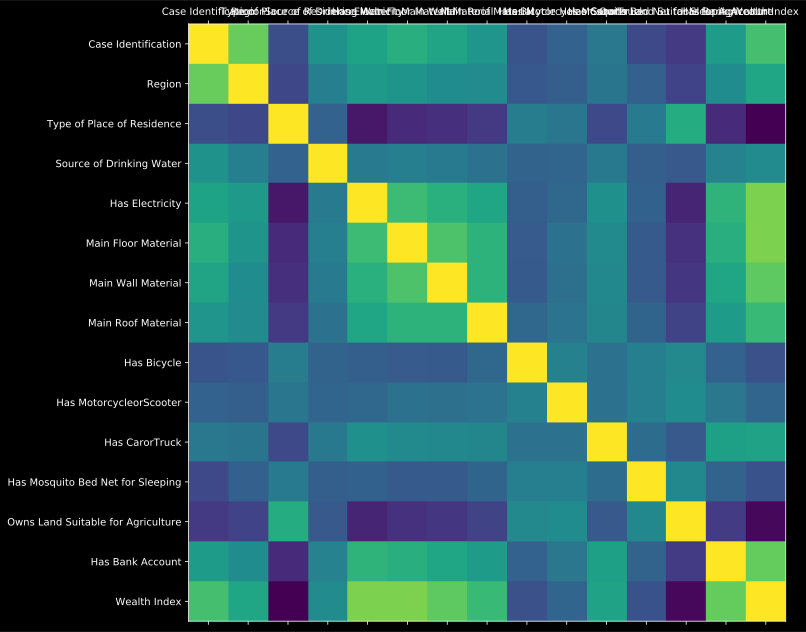

In [83]:
plot_corr(Malaria_ML)


 The correlations look good. There appear to be no coorelated columns.

 Next we want to check class distribution